<img src="https://i.hd-r.cn/50fedb3a675bfaa8f864aedca38696e5.jpg" alt="image" width="500"/>

# Phase 1 Project Proposal

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('/Users/apple/Desktop/Data/healthcare-dataset-stroke-data.csv')
df.head(3).T

,0,1,2
id,9046,51676,31112
gender,Male,Female,Male
age,67.0,61.0,80.0
hypertension,0,0,0
heart_disease,1,0,1
ever_married,Yes,Yes,Yes
work_type,Private,Self-employed,Private
Residence_type,Urban,Rural,Rural
avg_glucose_level,228.69,202.21,105.92
bmi,36.6,NaN,32.5


### Data Observation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.shape

(5110, 12)

In [5]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.83,21161.72,67.00,17741.25,36932.00,54682.00,72940.00
age,5110.0,43.23,22.61,0.08,25.00,45.00,61.00,82.00
hypertension,5110.0,0.10,0.30,0.00,0.00,0.00,0.00,1.00
heart_disease,5110.0,0.05,0.23,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,5110.0,106.15,45.28,55.12,77.24,91.88,114.09,271.74
bmi,4909.0,28.89,7.85,10.30,23.50,28.10,33.10,97.60
stroke,5110.0,0.05,0.22,0.00,0.00,0.00,0.00,1.00


In [6]:
round(df.describe(include = object).T,2)

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


column_name   percentage of missing value
id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


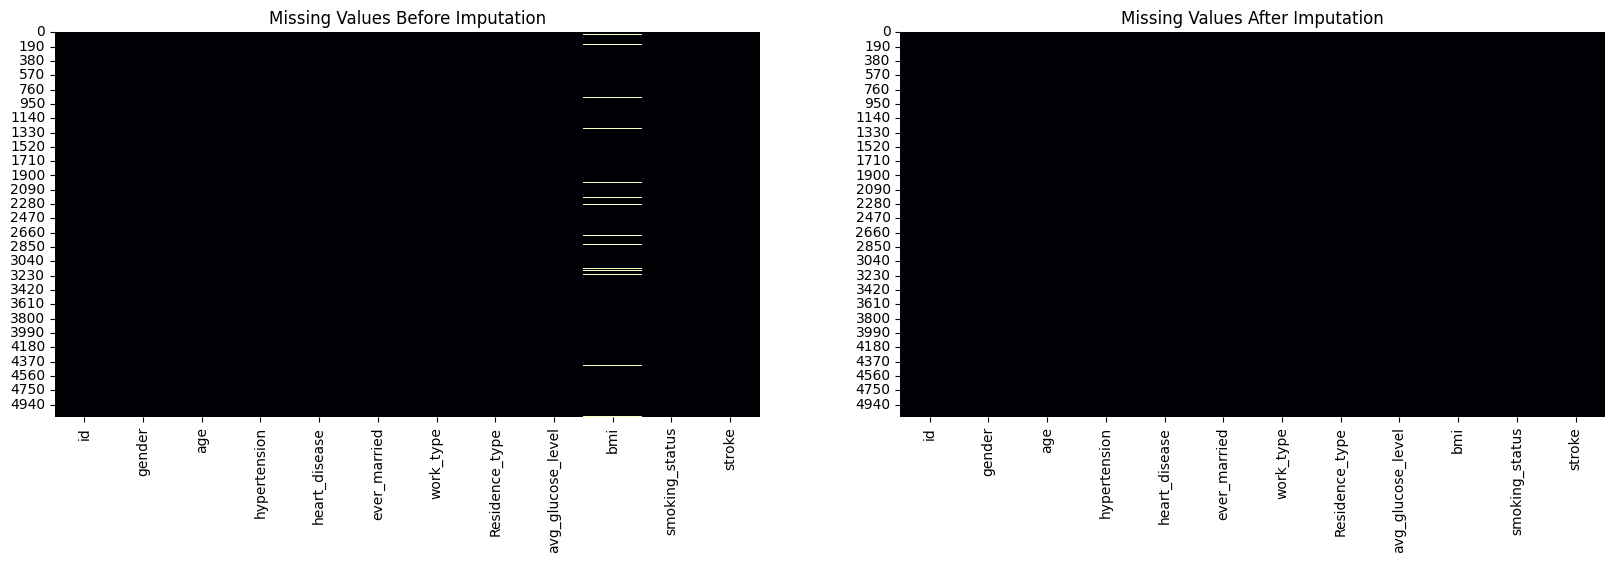

In [7]:
# From the table of descriptive statistics, we observe that mean and median values of bmi are very close to each other.
# Hence, we will fill the missing values with the mean values.
print('column_name   percentage of missing value')
print(df.isna().sum()/len(df) * 100)
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False,ax=axs[0])
axs[0].set_title('Missing Values Before Imputation')

df['bmi'].fillna(df['bmi'].mean(),inplace = True)
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False,ax=axs[1])
axs[1].set_title('Missing Values After Imputation')

plt.show()

From the table of descriptive statistics, we observe that mean and median values of bmi are very close to each other.
Hence, we will fill the missing values with the mean values.

In [8]:
print(f'all columns names:{df.columns.tolist()}')
numeric_lists = df.select_dtypes(exclude= object).columns.tolist()
numeric_lists

all columns names:['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke']

### The analysis of the Label

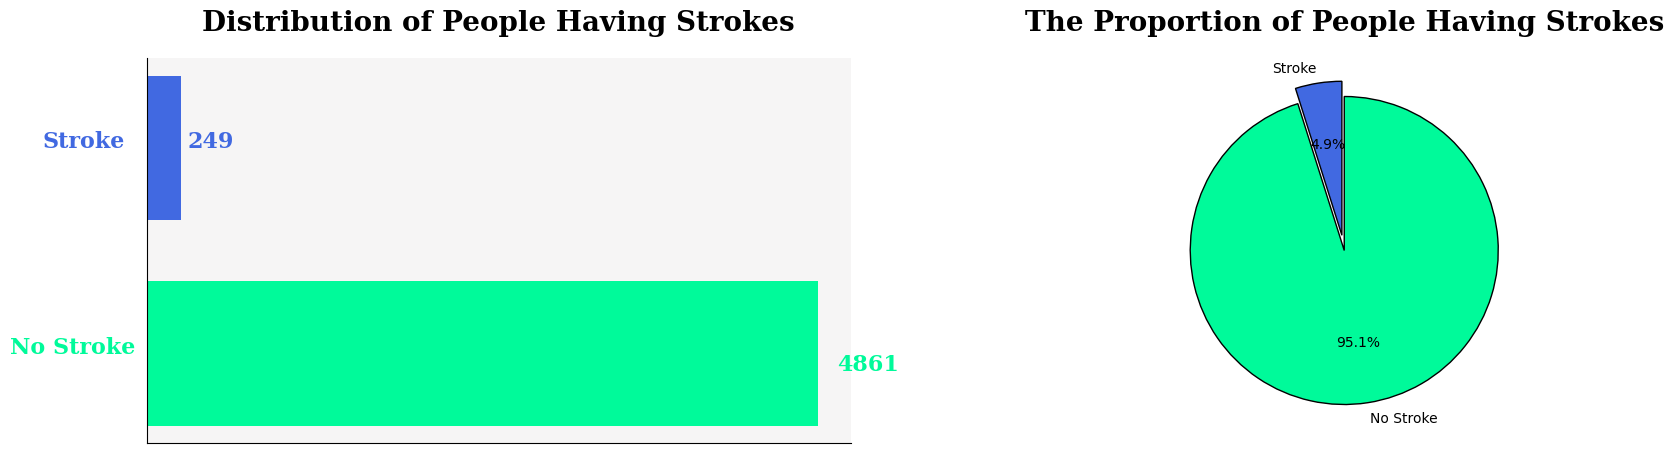

In [9]:
x = pd.DataFrame(df.groupby(['stroke'])['stroke'].count())

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

labels = ['Stroke', 'No Stroke']
sizes = [x.stroke[1], x.stroke[0]]
colors = ['#4169E1', '#00FA9A']

# Bar chart on the left
axs[0].barh([1], x.stroke[1], height=0.7, color='#4169E1')
axs[0].barh([0], x.stroke[0], height=0.7, color='#00FA9A')
axs[0].set_title('Distribution of People Having Strokes', font='Serif', size=20, weight='bold', pad=20)

# Add text annotations
axs[0].text(x.stroke[1] - 1000, 1, 'Stroke', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'style': 'normal', 'color': '#4169E1'})
axs[0].text(300, 1, sizes[0], {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#4169E1'})

axs[0].text(x.stroke[0] - 5850 , 0, 'No Stroke', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'style': 'normal', 'color': '#00FA9A'})
axs[0].text(5000, -0.08, sizes[1], {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#00FA9A'})

axs[0].set_facecolor('#f6f5f5')
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].axes.get_xaxis().set_visible(False)
axs[0].axes.get_yaxis().set_visible(False)

# Pie chart on the right

axs[1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors,
           wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})

axs[1].set_title('The Proportion of People Having Strokes', font='Serif', size=20, weight='bold', pad=20)

plt.show()


### View the correlation between numeric features and labels

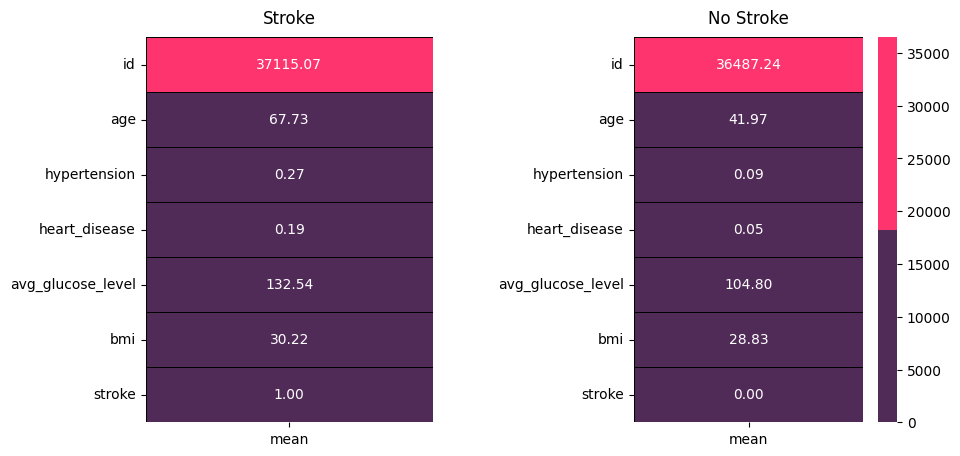

In [10]:
stroke = df[df['stroke']==1].describe().T
no_stroke = df[df['stroke']==0].describe().T
fix, axs = plt.subplots(1, 2, figsize=(10, 5))

colors=['#512b58','#fe346e']
sns.heatmap(stroke[['mean']],cmap=colors,annot=True,linewidths = 0.4,linecolor = 'black',fmt = '.2f',cbar=False,ax=axs[0])
sns.heatmap(no_stroke[['mean']],cmap=colors,annot=True,linewidths = 0.4,linecolor = 'black',fmt = '.2f',ax=axs[1])
axs[0].set_title('Stroke',pad=10)
axs[1].set_title('No Stroke',pad=10)
plt.subplots_adjust(wspace=0.7)

plt.show()


Mean values of all the features for cases of stroke suffered and no stroke suffered.
age and avg_glucose_level can be solid 1st hand indicators to identify a stroke.
Mean age values of patients that suffered a stroke, 67.73,is much higher than those did not suffer a stroke, 41.97.
Similarly, avg_glucose_level value of 132.54 can indicate a higher chance of suffering from stroke than the avg_glucose_level value of 104.80 that has been found in patients that did not suffer a stroke.

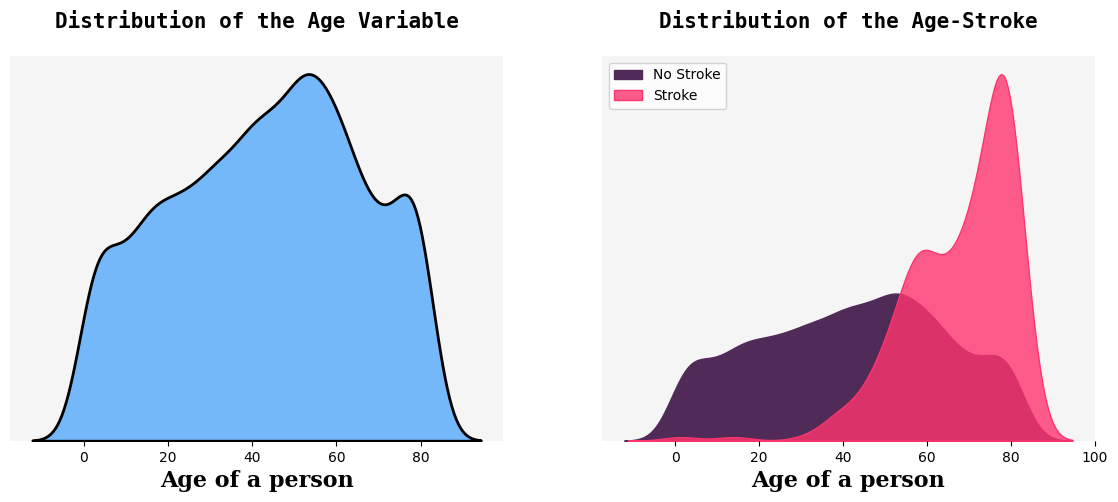

In [11]:
fix, axs = plt.subplots(1, 2, figsize=(14, 5))
# setting of axes; visibility of axes and spines turn off
for i in range(2):
    axs[i].axes.get_yaxis().set_visible(False)
    axs[i].set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        axs[i].spines[loc].set_visible(False)

axs[0].set_title('Distribution of the Age Variable',fontsize=15,fontweight='bold', fontfamily='monospace',pad=20)
sns.kdeplot(data=df['age'],color='#1E90FF',alpha=0.6,fill=True,linewidth=2,edgecolor='black',ax=axs[0])
axs[1].set_title('Distribution of the Age-Stroke',fontsize=15,fontweight='bold', fontfamily='monospace',pad=20)
sns.kdeplot(data = df[df['stroke'] == 0], x = 'age', fill = True,  alpha = 1, color = '#512b58',label='No Stroke',ax=axs[1])
sns.kdeplot(data = df[df['stroke'] == 1], x = 'age', fill = True,  alpha = 0.8, color = '#fe346e',label='Stroke',ax=axs[1])
axs[0].set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
axs[1].set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
axs[1].legend(loc='upper left')
plt.show()

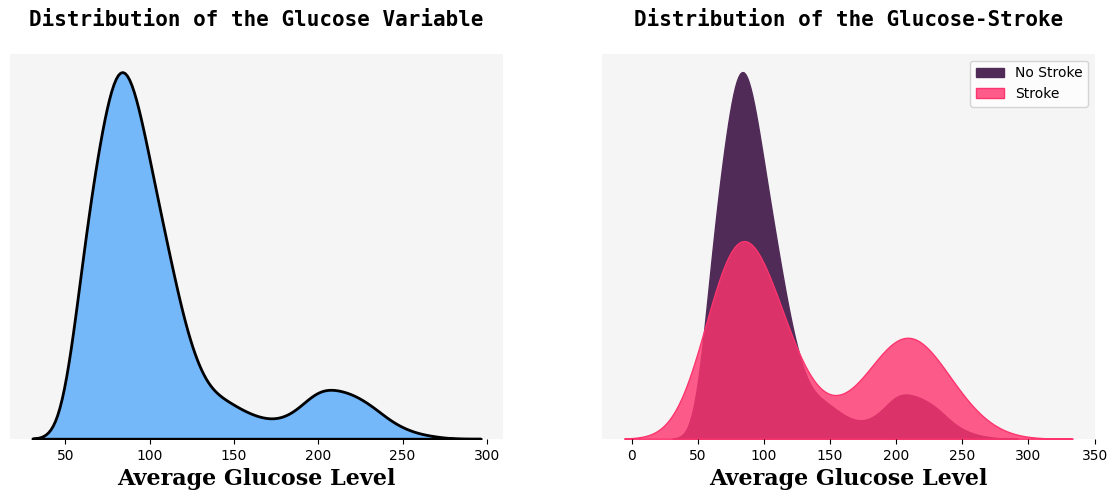

In [12]:
fix, axs = plt.subplots(1, 2, figsize=(14, 5))

for i in range(2):
    axs[i].axes.get_yaxis().set_visible(False)
    axs[i].set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        axs[i].spines[loc].set_visible(False)

axs[0].set_title('Distribution of the Glucose Variable',fontsize=15,fontweight='bold', fontfamily='monospace',pad=20)
sns.kdeplot(data=df['avg_glucose_level'],color='#1E90FF',alpha=0.6,fill=True,linewidth=2,edgecolor='black',ax=axs[0])
axs[1].set_title('Distribution of the Glucose-Stroke',fontsize=15,fontweight='bold', fontfamily='monospace',pad=20)
sns.kdeplot(data = df[df['stroke'] == 0], x = 'avg_glucose_level', fill = True,  alpha = 1, color = '#512b58',label='No Stroke',ax=axs[1])
sns.kdeplot(data = df[df['stroke'] == 1], x = 'avg_glucose_level', fill = True,  alpha = 0.8, color = '#fe346e',label='Stroke',ax=axs[1])
axs[0].set_xlabel('Average Glucose Level', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
axs[1].set_xlabel('Average Glucose Level', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
axs[1].legend(loc='upper right')
plt.show()

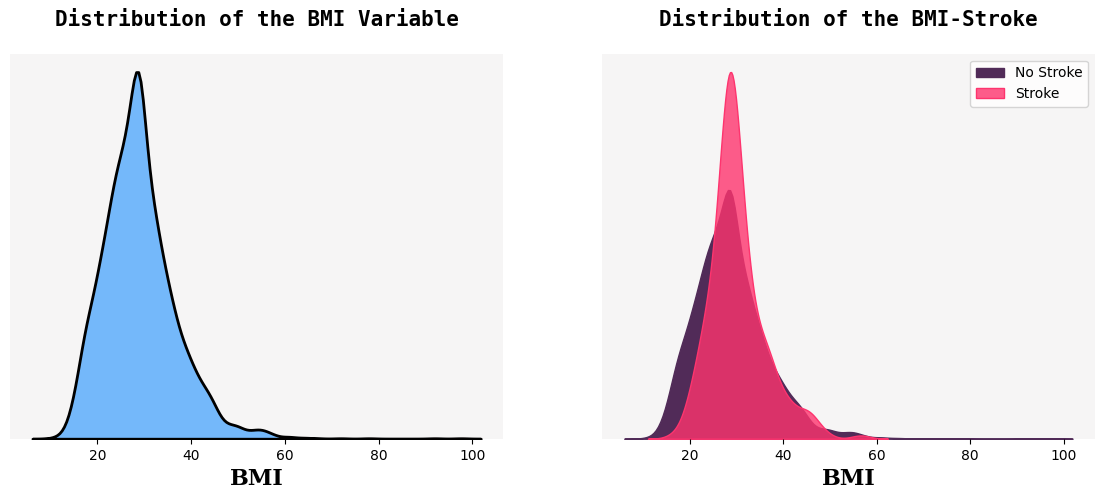

In [13]:
fix, axs = plt.subplots(1, 2, figsize=(14, 5))

for i in range(2):
    axs[i].axes.get_yaxis().set_visible(False)
    axs[i].set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        axs[i].spines[loc].set_visible(False)

axs[0].set_title('Distribution of the BMI Variable',fontsize=15,fontweight='bold', fontfamily='monospace',pad=20)
sns.kdeplot(data=df['bmi'],color='#1E90FF',alpha=0.6,fill=True,linewidth=2,edgecolor='black',ax=axs[0])
axs[1].set_title('Distribution of the BMI-Stroke',fontsize=15,fontweight='bold', fontfamily='monospace',pad=20)
sns.kdeplot(data = df[df['stroke'] == 0], x = 'bmi', fill = True,  alpha = 1, color = '#512b58',label='No Stroke',ax=axs[1])
sns.kdeplot(data = df[df['stroke'] == 1], x = 'bmi', fill = True,  alpha = 0.8, color = '#fe346e',label='Stroke',ax=axs[1])
axs[0].set_xlabel('BMI', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
axs[1].set_xlabel('BMI', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
axs[1].legend(loc='upper right')
plt.show()

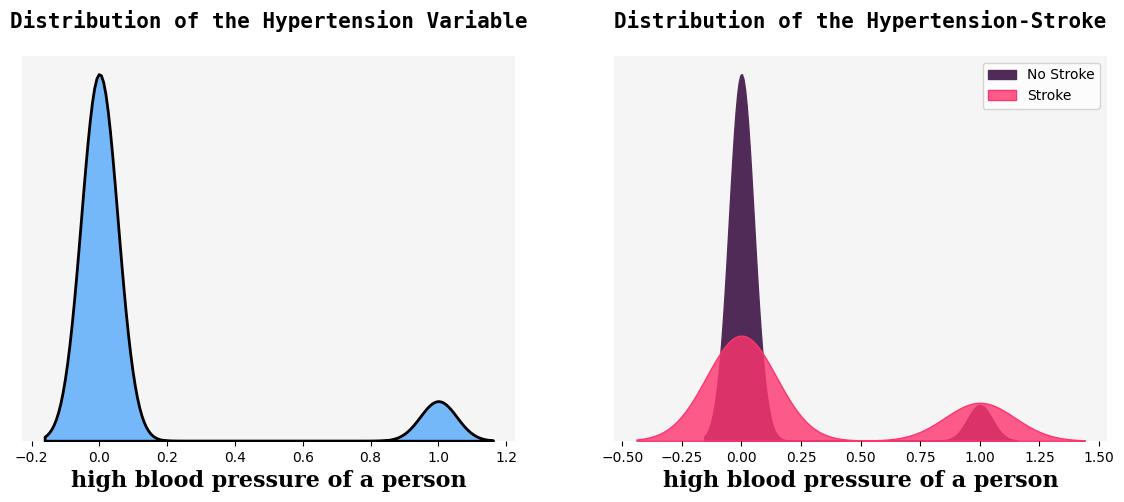

In [14]:
fix, axs = plt.subplots(1, 2, figsize=(14, 5))

for i in range(2):
    axs[i].axes.get_yaxis().set_visible(False)
    axs[i].set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        axs[i].spines[loc].set_visible(False)

axs[0].set_title('Distribution of the Hypertension Variable',fontsize=15,fontweight='bold', fontfamily='monospace',pad=20)
sns.kdeplot(data=df['hypertension'],color='#1E90FF',alpha=0.6,fill=True,linewidth=2,edgecolor='black',ax=axs[0])
axs[1].set_title('Distribution of the Hypertension-Stroke',fontsize=15,fontweight='bold', fontfamily='monospace',pad=20)
sns.kdeplot(data = df[df['stroke'] == 0], x = 'hypertension', fill = True,  alpha = 1, color = '#512b58',label='No Stroke',ax=axs[1])
sns.kdeplot(data = df[df['stroke'] == 1], x = 'hypertension', fill = True,  alpha = 0.8, color = '#fe346e',label='Stroke',ax=axs[1])
axs[0].set_xlabel('high blood pressure of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
axs[1].set_xlabel('high blood pressure of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
axs[1].legend(loc='upper right')
plt.show()

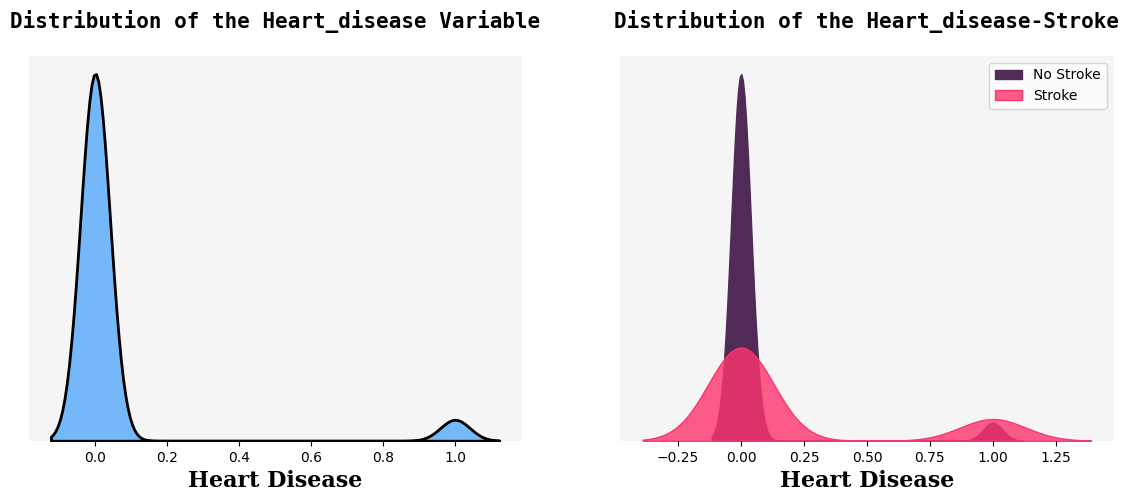

In [15]:
fix, axs = plt.subplots(1, 2, figsize=(14, 5))

for i in range(2):
    axs[i].axes.get_yaxis().set_visible(False)
    axs[i].set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        axs[i].spines[loc].set_visible(False)

axs[0].set_title('Distribution of the Heart_disease Variable',fontsize=15,fontweight='bold', fontfamily='monospace',pad=20)
sns.kdeplot(data=df['heart_disease'],color='#1E90FF',alpha=0.6,fill=True,linewidth=2,edgecolor='black',ax=axs[0])
axs[1].set_title('Distribution of the Heart_disease-Stroke',fontsize=15,fontweight='bold', fontfamily='monospace',pad=20)
sns.kdeplot(data = df[df['stroke'] == 0], x = 'heart_disease', fill = True,  alpha = 1, color = '#512b58',label='No Stroke',ax=axs[1])
sns.kdeplot(data = df[df['stroke'] == 1], x = 'heart_disease', fill = True,  alpha = 0.8, color = '#fe346e',label='Stroke',ax=axs[1])
axs[0].set_xlabel('Heart Disease', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
axs[1].set_xlabel('Heart Disease', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
axs[1].legend(loc='upper right')
plt.show()

In [16]:
print(df['heart_disease'].value_counts())
df['hypertension'].value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64


hypertension
0    4612
1     498
Name: count, dtype: int64

In [17]:
df1 = df.copy()

In [18]:
print(df['gender'].value_counts())
df = df[df['gender'] != 'Other']
print(df['gender'].value_counts())
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1}).astype(np.uint8)

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
gender
Female    2994
Male      2115
Name: count, dtype: int64


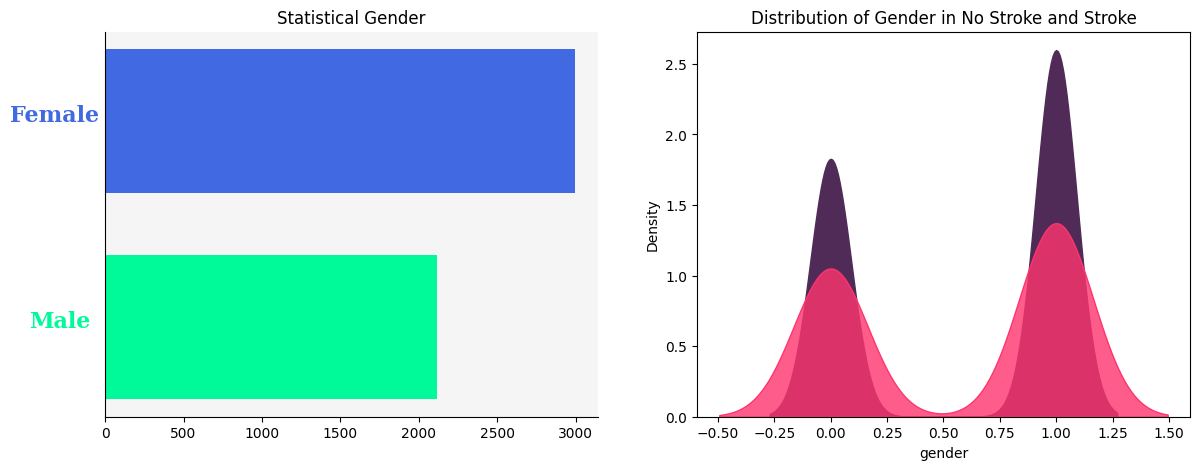

In [19]:
# Statistical Gender

colors = ['#FF69B4', '#6495ED']
fix, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].barh(y=[1], width=df[df['gender']==1]['gender'].count(), height=0.7, color='#4169E1')
axs[0].barh(y=[0], width=df[df['gender']==0]['gender'].count(), height=0.7, color='#00FA9A')

axs[0].text(x=df[df['gender']==1]['gender'].count()-3600 , y=1, s='Female', fontdict={'font': 'Serif', 'weight': 'bold', 'size': 16, 'style': 'normal', 'color': '#4169E1'})
axs[0].text(x=300, y=1, s=df[df['gender']==1]['gender'].count(), fontdict={'font': 'Serif', 'weight': 'bold', 'size': 16, 'color': '#4169E1'})

axs[0].text(x=df[df['gender']==0]['gender'].count()-2600, y=0, s='Male', fontdict={'font': 'Serif', 'weight': 'bold', 'size': 16, 'style': 'normal', 'color': '#00FA9A'})
axs[0].text(x=1000, y=-0.08, s=df[df['gender']==0]['gender'].count(), fontdict={'font': 'Serif', 'weight': 'bold', 'size': 16, 'color': '#00FA9A'})
axs[0].set_title('Statistical Gender')
axs[0].set_facecolor('#f6f5f5')
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].axes.get_yaxis().set_visible(False)

sns.kdeplot(data=df[df['stroke'] == 0], x=df[df['stroke'] == 0]['gender'], fill=True, alpha=1, color='#512b58', label='No Stroke', ax=axs[1])
sns.kdeplot(data=df[df['stroke'] == 1], x=df[df['stroke'] == 1]['gender'], fill=True, alpha=0.8, color='#fe346e', label='Stroke', ax=axs[1])
axs[1].set_title('Distribution of Gender in No Stroke and Stroke')

plt.show()

In [20]:
print(df['gender'].value_counts())

gender
1    2994
0    2115
Name: count, dtype: int64


In [21]:
# print(max(df['bmi']))
# df['bmi'].value_counts()

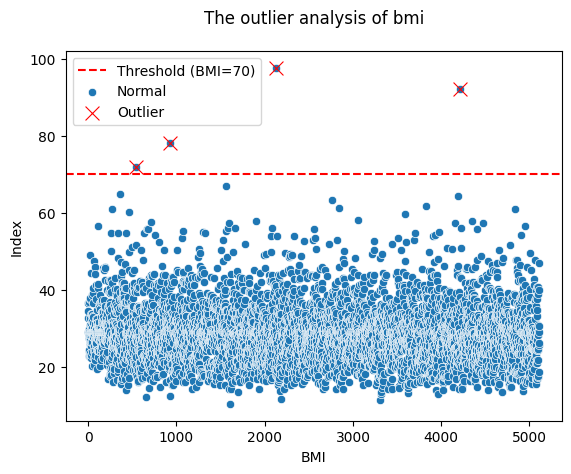

In [22]:
outliers = df[df['bmi'] > 70]
plt.axhline(y=70, color='red', linestyle='--', label='Threshold (BMI=70)')
scatter_plot = sns.scatterplot(data=df['bmi'],label='Normal')
sns.scatterplot(x=outliers.index, y=outliers['bmi'], label='Outlier', color='red', marker='x', s=100)
plt.title('The outlier analysis of bmi',pad=20)
plt.ylabel('Index')
plt.xlabel('BMI')
plt.show()

In [23]:
# clean the bmi >70 
df = df[df['bmi']<=70]
df1 = df1[df1['bmi']<=70]

In [24]:
df = df.drop(columns = ['id'])

le = LabelEncoder()
object_lists = df.select_dtypes(include= object).columns.tolist()
for i in object_lists:
    df[i] = le.fit_transform(df[i])
# display the samples
df.head(3).T

,0,1,2
gender,0.00,1.000000,0.00
age,67.00,61.000000,80.00
hypertension,0.00,0.000000,0.00
heart_disease,1.00,0.000000,1.00
ever_married,1.00,1.000000,1.00
work_type,2.00,3.000000,2.00
Residence_type,1.00,0.000000,0.00
avg_glucose_level,228.69,202.210000,105.92
bmi,36.60,28.893237,32.50
smoking_status,1.00,2.000000,2.00


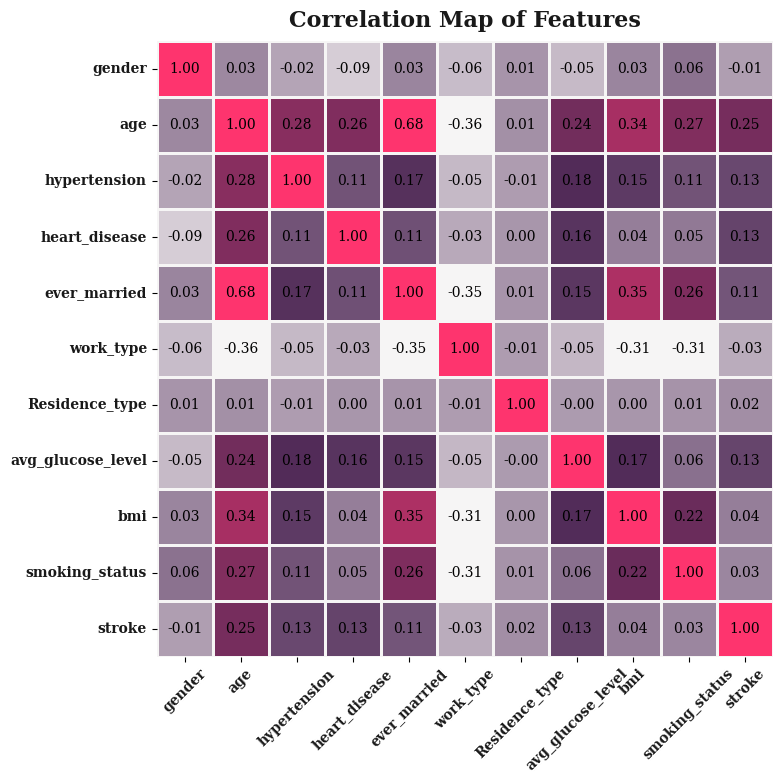

In [25]:
import matplotlib
fig, ax = plt.subplots(figsize=(8, 8))
# fig.patch.set_facecolor('#f6f5f5')
# ax.set_facecolor('#f6f5f5')

colors = ['#f6f5f5', '#512b58', '#fe346e']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

# plot heatmap
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap=colormap,
            vmin=-0.15, vmax=0.5, cbar_kws={"shrink": 0.5}, ax=ax, cbar=False,
            linewidth=1, linecolor='#f6f5f5', square=True,
            annot_kws={'font': 'serif', 'size': 10, 'color': 'black'})

# yticks
ax.tick_params(axis='y', rotation=0)

# set x and y tick labels
xticks = df.columns.tolist()
yticks = df.columns.tolist()

ax.set_xticklabels(xticks, font='Serif', size=10, weight='bold', rotation=45, alpha=0.9)
ax.set_yticklabels(yticks, font='Serif', size=10, weight='bold', rotation=0, alpha=0.9)

plt.title('Correlation Map of Features', font='Serif', size=16, weight='bold', alpha=0.9,pad=10)

plt.show()

# Phase 2 Experiment and Analysis

After the first phase of data exploration and processing, we now go to the second phase: model building and evaluation model

<img src="https://i.hd-r.cn/4da863d8ad1c68ee75bbc705cddb3ea5.jpg" alt="image" width="500"/>

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, auc,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [27]:
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


### Feature Extraction

In [28]:
df1['bmi_group'] = pd.cut(df1['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
df1['age_group'] = pd.cut(df1['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])
df1['glucose_group'] = pd.cut(df1['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_group,age_group,glucose_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Obesity,Elderly,High
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,Overweight,Elderly,High
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Obesity,Elderly,Normal
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Obesity,Mid Adults,High
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Ideal,Elderly,High


In [29]:
ss = StandardScaler()
le = LabelEncoder()

X = df1.drop(['stroke','id'], axis=1)
Y = df1['stroke']

In [30]:
numeric_lists = X.select_dtypes(include=['int64', 'float', 'float64']).columns.tolist()
X[numeric_lists] = ss.fit_transform(X[numeric_lists])

object_lists = X.select_dtypes(exclude=['int64', 'float', 'float64', 'int']).columns.tolist()
for i in object_lists:
    X[i] = le.fit_transform(X[i])
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,bmi_group,age_group,glucose_group
0,1,1.050791,-0.327646,4.183300,1,2,1,2.707351,1.028823,1,1,2,0
1,0,0.785474,-0.327646,-0.239046,1,3,0,2.122299,0.005821,2,2,2,0
2,1,1.625646,-0.327646,4.183300,1,2,0,-0.005141,0.484586,2,1,2,2
3,0,0.254839,-0.327646,-0.239046,1,2,1,1.437824,0.736793,3,1,3,0
4,0,1.581426,3.052073,-0.239046,1,3,0,1.501676,-0.643710,2,0,2,0


In [31]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,shuffle=True,random_state=42)
print(f'x_train:{x_train.shape}')
print(f'x_test:{x_test.shape}')
print(f'y_train:{y_train.shape}')
print(f'y_test:{y_test.shape}')

x_train:(3574, 13)
x_test:(1532, 13)
y_train:(3574,)
y_test:(1532,)


### Oversampling with SMOTE

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_resample, y_resample = smote.fit_resample(x_train, y_train.ravel())

In [33]:
print('Shape of Training features: {}'.format(x_resample.shape))
print('Shape of Training targets: {}'.format(y_resample.shape))
print('Shape of Testing features: {}'.format(x_test.shape))
print('Shape of Testing targets: {}'.format(y_test.shape))

Shape of Training features: (6828, 13)
Shape of Training targets: (6828,)
Shape of Testing features: (1532, 13)
Shape of Testing targets: (1532,)


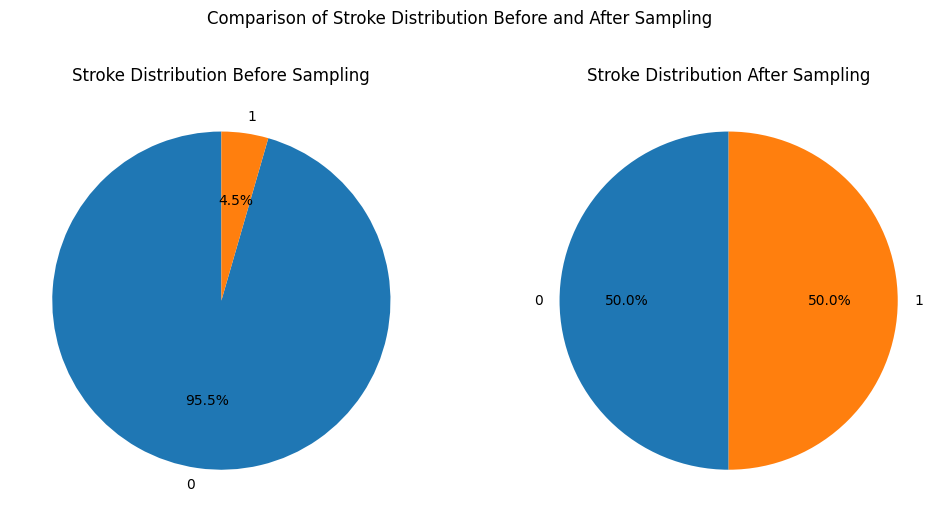

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart before sampling
stroke_before = y_train.value_counts()
axes[0].pie(stroke_before, labels=stroke_before.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Stroke Distribution Before Sampling')

# After sampling
stroke_after = pd.Series(y_resample).value_counts()
axes[1].pie(stroke_after, labels=stroke_after.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Stroke Distribution After Sampling')

fig.suptitle('Comparison of Stroke Distribution Before and After Sampling')
plt.show()


### Feature Selection with Filter Method

In [35]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k = 10)
X_new = selector.fit_transform(x_resample, y_resample)

selected_indices = selector.get_support()
feature_names = X.columns.tolist()
selected_features = [feature_names[i] for i, selected in enumerate(selected_indices) if selected]
feature_scores = selector.scores_

# create a new dataframe 
fm_df = pd.DataFrame(data = zip(selected_features, feature_scores[selected_indices]), columns=['Feature_Name', 'F_Scores'])
fm_df.sort_values('F_Scores', ascending=False)

,Feature_Name,F_Scores
1,age,4126.742680
8,age_group,483.872869
7,avg_glucose_level,402.058953
9,glucose_group,352.515173
3,heart_disease,351.325902
2,hypertension,344.059782
4,ever_married,181.015547
5,work_type,178.589805
0,gender,124.507676
6,Residence_type,124.007536


In [36]:
fm_df['Feature_Name'].values.tolist()

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'age_group',
 'glucose_group']

In [37]:
x_resample = x_resample[fm_df['Feature_Name'].values.tolist()]
x_test = x_test[fm_df['Feature_Name'].values.tolist()]

### Modeling

In [38]:
def select_best_model(model_params, x_train, y_train, x_test, y_test):
    models = [
        ('Decision Tree', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('SVM', SVC(probability=True)),
        ('XGBoost', XGBClassifier()),
        ('Logistic Regression', LogisticRegression())
    ]
    
    results = []

    for model_name, model in models:
        steps = [('model', model)]
        pipe = Pipeline(steps)
        grid = GridSearchCV(pipe, model_params[model_name])
        grid.fit(x_train, y_train)
        y_pred = grid.predict(x_test)
        # ROC
        y_prob = grid.predict_proba(x_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        
        accuracy = accuracy_score(y_test, y_pred)
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        cv_score = cross_val_score(model, x_train, y_train, cv=cv, scoring='roc_auc').mean()
        roc_score = roc_auc_score(y_test, y_pred)
        score = grid.score(x_test, y_test)
        
        cm = confusion_matrix(y_test, y_pred)

        roc_curve_data = {
            'FPR': fpr,
            'TPR': tpr,
            'Thresholds': thresholds
        }
        
        results.append({
            'Model': model_name,
            'Score': score,
            'Accuracy': accuracy,
            'CV_ROC_AUC': cv_score,
            'ROC_AUC_Score': roc_score,
            'Best_Params': grid.best_params_,
            'Grid_Object': grid,
            'Confusion_Matrix': cm,
            'ROC_Curve_Data': roc_curve_data
        })

    result_df = pd.DataFrame(results)
    return result_df

In [39]:
model_params = {
    'Decision Tree': {'model__max_depth': [None, 10, 20]},
    'Random Forest': {'model__n_estimators': [50, 100, 200]},
    'SVM': {'model__C': [1, 10, 100]},
    'XGBoost': {'model__n_estimators': [50, 100, 200],'model__max_depth': [1, 3, 5],'model__learning_rate': [0.01, 0.1, 0.2]},
    'Logistic Regression': {'model__C': [0.1, 1, 10]}
}

results_df = select_best_model(model_params, x_resample, y_resample, x_test, y_test)
results_df

,Model,Score,Accuracy,CV_ROC_AUC,ROC_AUC_Score,Best_Params,Grid_Object,Confusion_Matrix,ROC_Curve_Data
0,Decision Tree,0.883159,0.883159,0.911885,0.616416,{'model__max_depth': 20},GridSearchCV(estimator=Pipeline(steps=[('model...,"[[1325, 118], [61, 28]]","{'FPR': [0.0, 0.06860706860706861, 0.071379071..."
1,Random Forest,0.877285,0.877285,0.981496,0.597483,{'model__n_estimators': 50},GridSearchCV(estimator=Pipeline(steps=[('model...,"[[1319, 124], [64, 25]]","{'FPR': [0.0, 0.002079002079002079, 0.00415800..."
2,SVM,0.826371,0.826371,0.925988,0.612628,{'model__C': 100},GridSearchCV(estimator=Pipeline(steps=[('model...,"[[1233, 210], [56, 33]]","{'FPR': [0.0, 0.000693000693000693, 0.01178101..."
3,XGBoost,0.891645,0.891645,0.986033,0.557663,"{'model__learning_rate': 0.2, 'model__max_dept...",GridSearchCV(estimator=Pipeline(steps=[('model...,"[[1350, 93], [73, 16]]","{'FPR': [0.0, 0.000693000693000693, 0.00277200..."
4,Logistic Regression,0.750000,0.750000,0.883620,0.735503,{'model__C': 0.1},GridSearchCV(estimator=Pipeline(steps=[('model...,"[[1085, 358], [25, 64]]","{'FPR': [0.0, 0.000693000693000693, 0.00623700..."


In [52]:
tuned_model_params = {
    'Decision Tree': {'model__max_depth': [25, 30, 35]},
    'Random Forest': {'model__n_estimators': [100,200,300]},
    'SVM': {'model__C': [100,200,300]},
    'XGBoost': {'model__n_estimators': [200,300,400],'model__max_depth': [5,10,15],'model__learning_rate': [0.1,0.2,0.3]},
    'Logistic Regression': {'model__C': [0.05,0.1, 1]}
}

results_df_after = select_best_model(tuned_model_params, x_resample, y_resample, x_test, y_test)
results_df_after

,Model,Score,Accuracy,CV_ROC_AUC,ROC_AUC_Score,Best_Params,Grid_Object,Confusion_Matrix,ROC_Curve_Data
0,Decision Tree,0.888381,0.888381,0.912031,0.592831,{'model__max_depth': 35},GridSearchCV(estimator=Pipeline(steps=[('model...,"[[1338, 105], [66, 23]]","{'FPR': [0.0, 0.07276507276507277, 1.0], 'TPR'..."
1,Random Forest,0.876632,0.876632,0.981240,0.597137,{'model__n_estimators': 100},GridSearchCV(estimator=Pipeline(steps=[('model...,"[[1318, 125], [64, 25]]","{'FPR': [0.0, 0.001386001386001386, 0.00207900..."
2,SVM,0.829634,0.829634,0.925988,0.614361,{'model__C': 200},GridSearchCV(estimator=Pipeline(steps=[('model...,"[[1238, 205], [56, 33]]","{'FPR': [0.0, 0.000693000693000693, 0.01593901..."
3,XGBoost,0.885770,0.885770,0.986033,0.544002,"{'model__learning_rate': 0.1, 'model__max_dept...",GridSearchCV(estimator=Pipeline(steps=[('model...,"[[1343, 100], [75, 14]]","{'FPR': [0.0, 0.000693000693000693, 0.00485100..."
4,Logistic Regression,0.750000,0.750000,0.883620,0.735503,{'model__C': 0.1},GridSearchCV(estimator=Pipeline(steps=[('model...,"[[1085, 358], [25, 64]]","{'FPR': [0.0, 0.000693000693000693, 0.00623700..."


In [40]:
# draw the confusion_matrix
def draw_confusion_matrix(model_result):
    fig, axs = plt.subplots(1,5,figsize=(25,5))
    for idx, row in model_result.iterrows():
        ax = axs[idx]
        sns.heatmap(row['Confusion_Matrix']
                    ,annot=True, fmt='d', cmap='Blues', cbar=False,ax=ax)
        ax.set_title(f'Confusion Matrix - {row["Model"]}')
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    plt.tight_layout()    
    plt.show()

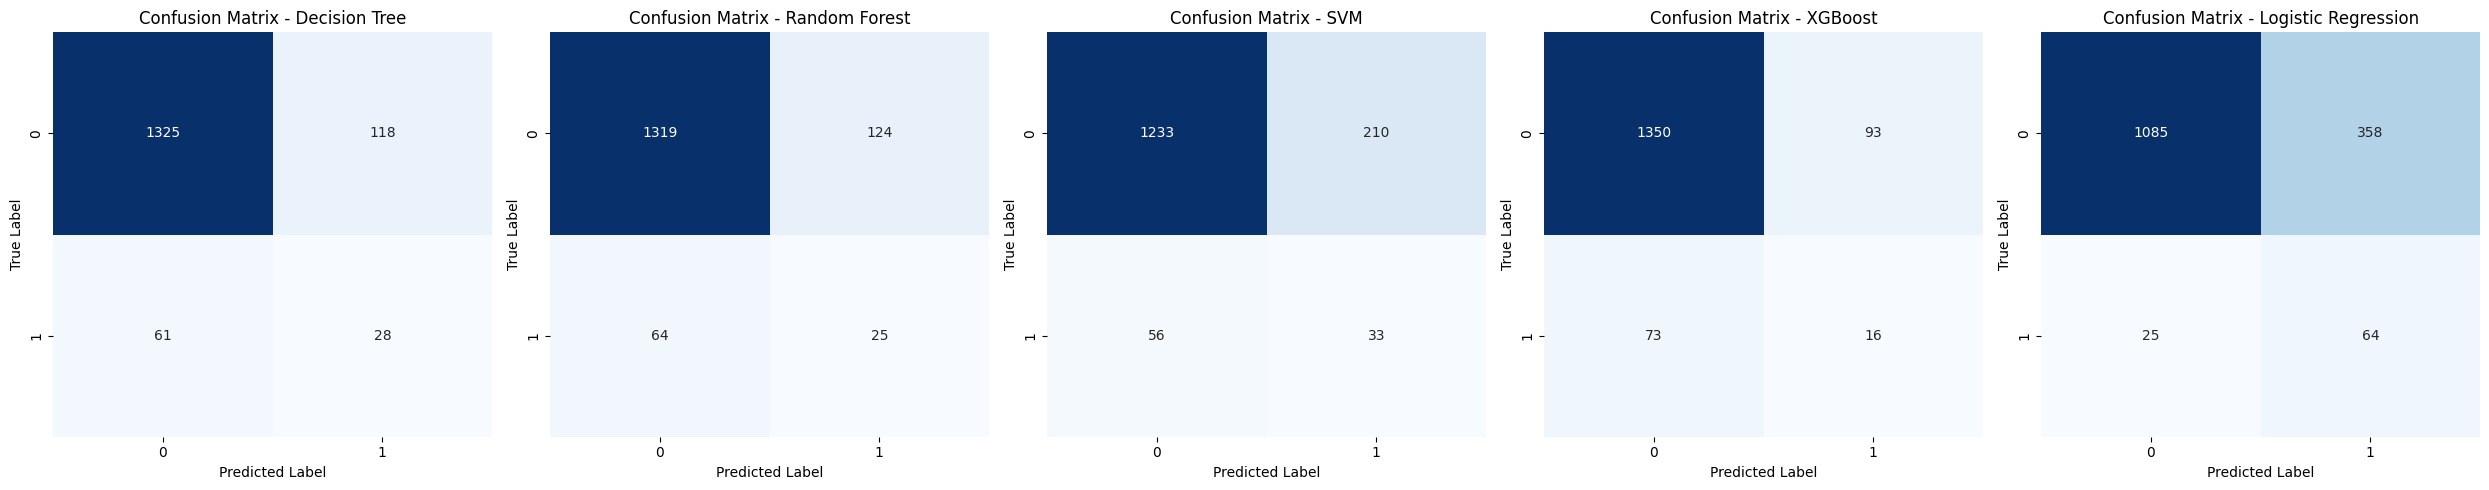

In [41]:
draw_confusion_matrix(results_df)

In [42]:
def calculate_metrics(model_name, y_test, y_pred, conf_matrix):
    precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
    recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
    fpr = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])
    accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()

    metrics_df = pd.DataFrame({
        'Model': [model_name],
        'Precision': [precision],
        'Recall': [recall],
        'FP Rate': [fpr],
        'Accuracy': [accuracy]
    })

    return metrics_df

In [43]:
all_metrics_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'FP Rate', 'Accuracy'])

for _, result in results_df.iterrows():
    model_name = result['Model']
    y_pred = result['Grid_Object'].predict(x_test)
    conf_matrix = result['Confusion_Matrix']
    
    metrics_df = calculate_metrics(model_name, y_test, y_pred, conf_matrix)
    if all_metrics_df.empty:
        all_metrics_df = metrics_df
    else:
        all_metrics_df = pd.concat([all_metrics_df, metrics_df], ignore_index=True)

all_metrics_df


,Model,Precision,Recall,FP Rate,Accuracy
0,Decision Tree,0.191781,0.314607,0.081774,0.883159
1,Random Forest,0.167785,0.280899,0.085932,0.877285
2,SVM,0.135802,0.370787,0.145530,0.826371
3,XGBoost,0.146789,0.179775,0.064449,0.891645
4,Logistic Regression,0.151659,0.719101,0.248094,0.750000


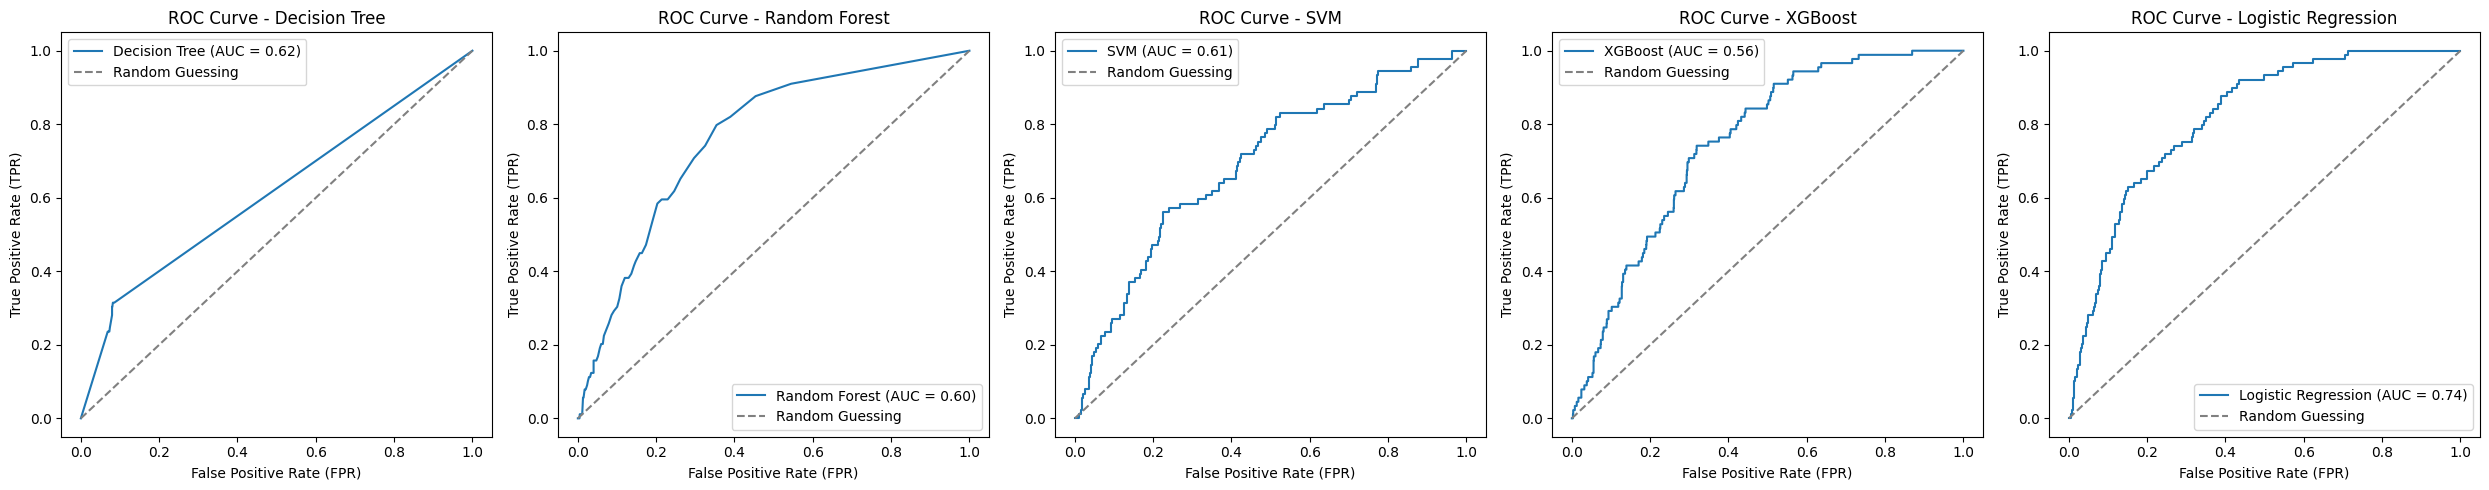

In [44]:
# draw ROC_AUC plot
def plot_roc_curve(model_results):
    fig, axs = plt.subplots(1, 5, figsize=(25, 5)) 
    for idx, result in model_results.iterrows():
        model_name = result['Model']
        fpr = result['ROC_Curve_Data']['FPR']
        tpr = result['ROC_Curve_Data']['TPR']
        auc_score = result['ROC_AUC_Score']

        axs[idx].plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
        axs[idx].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
        axs[idx].set_xlabel('False Positive Rate (FPR)')
        axs[idx].set_ylabel('True Positive Rate (TPR)')
        axs[idx].set_title(f'ROC Curve - {model_name}')
        axs[idx].legend()

    plt.tight_layout()
    plt.show()

plot_roc_curve(results_df)

In [45]:
# for i in range(len(results_df['Model'].values.tolist())):
# RandomForest
results_df['Grid_Object'][1]

GridSearchCV(estimator=Pipeline(steps=[('model', RandomForestClassifier())]),
             param_grid={'model__n_estimators': [50, 100, 200]})

In [46]:
# LogisticRegression
results_df['Grid_Object'][4]

GridSearchCV(estimator=Pipeline(steps=[('model', LogisticRegression())]),
             param_grid={'model__C': [0.1, 1, 10]})

In [47]:
for idx, row in results_df.iterrows():
    print(idx,row)

0 Model                                                   Decision Tree
Score                                                        0.883159
Accuracy                                                     0.883159
CV_ROC_AUC                                                   0.911885
ROC_AUC_Score                                                0.616416
Best_Params                                  {'model__max_depth': 20}
Grid_Object         GridSearchCV(estimator=Pipeline(steps=[('model...
Confusion_Matrix                              [[1325, 118], [61, 28]]
ROC_Curve_Data      {'FPR': [0.0, 0.06860706860706861, 0.071379071...
Name: 0, dtype: object
1 Model                                                   Random Forest
Score                                                        0.877285
Accuracy                                                     0.877285
CV_ROC_AUC                                                   0.981496
ROC_AUC_Score                                                0.

In [53]:
results_df_after['Best_Params'][3]

{'model__learning_rate': 0.1,
 'model__max_depth': 10,
 'model__n_estimators': 200}